# Q1

In [321]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
keras.__version__

'2.4.3'

In [42]:
def load():
    ( train_X , train_Y ) , ( test_X , test_Y ) = mnist.load_data()
    # convert from integers to floats
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # normalize using minmaxscaler
    train_X = train_X/255.0
    test_X = test_X/255.0
    # return normalized inputs
    train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
    test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
    train_Y = to_categorical(train_Y)
    test_Y = to_categorical(test_Y)
    return train_X, train_Y, test_X, test_Y

In [43]:
def create_cnn():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform',input_shape =(28,28,1) ))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation = 'softmax') )
    # initialize optimizer
    opt = SGD( lr =0.01 , momentum =0.9)
    # compile model
    model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics =['accuracy'])
    return model

In [62]:
def train_10(model):
    epoch_history = model.fit(train_X, train_Y, batch_size = 32, epochs = 10, validation_split = 0.1)
    score = model.evaluate(test_X, test_Y, verbose =0)
    return epoch_history, score

In [64]:
train_X, train_Y, test_X, test_Y = load()
model = create_cnn()
epoch_history, score = train_10(model)

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1592 - accuracy: 0.9516 - val_loss: 0.0754 - val_accuracy: 0.9787
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0495 - val_accuracy: 0.9880
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0471 - val_accuracy: 0.9883
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0431 - val_accuracy: 0.9882
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0433 - val_accuracy: 0.9890
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0468 - val_ac

In [65]:
score

[0.039661720395088196, 0.9882000088691711]

The accuracy on test set is 0.9869999885559082

## Experiments

### i. Increasing to 50 epochs

In [79]:
def train_50(model):   
    epoch_history = model.fit( train_X, train_Y, batch_size = 32, epochs = 50, validation_split = 0.1)
    score = model.evaluate(test_X, test_Y, verbose =0)
    return epoch_history, score

In [81]:
model = create_cnn()
epoch_history_i, score_i = train_50(model)

Epoch 1/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1636 - accuracy: 0.9499 - val_loss: 0.0693 - val_accuracy: 0.9800
Epoch 2/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0499 - val_accuracy: 0.9865
Epoch 3/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0494 - val_accuracy: 0.9873
Epoch 4/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0515 - val_accuracy: 0.9875
Epoch 5/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 6/50
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 7/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0518 -

In [88]:
score_i

[0.04604247212409973, 0.988099992275238]

### ii. Add drop outs

In [90]:
def create_cnn_drops():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform',input_shape =(28,28,1) ))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flatten output
    model.add(Flatten())
    # Drop out 50 percent of 
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation = 'softmax') )
    # initialize optimizer
    opt = SGD( lr =0.01 , momentum =0.9)
    # compile model
    model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics =['accuracy'])
    return model

In [91]:
model = create_cnn_drops()
epoch_history_ii, score_ii = train_50(model)

Epoch 1/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2217 - accuracy: 0.9314 - val_loss: 0.0624 - val_accuracy: 0.9833
Epoch 2/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0900 - accuracy: 0.9717 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 3/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0682 - accuracy: 0.9782 - val_loss: 0.0472 - val_accuracy: 0.9865
Epoch 4/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.0460 - val_accuracy: 0.9882
Epoch 5/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 6/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0387 - accuracy: 0.9869 - val_loss: 0.0382 - val_accuracy: 0.9897
Epoch 7/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0334 -

In [92]:
score_ii

[0.041351933032274246, 0.9901999831199646]

### iii. Add convolution layer

In [70]:
def create_cnn_2convs():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform',input_shape =(28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer    
    model.add(Conv2D(64, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform'))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation = 'softmax') )
    # initialize optimizer
    opt = SGD( lr =0.01 , momentum =0.9)
    # compile model
    model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics =['accuracy'])
    return model

In [71]:
model = create_cnn_2convs()
epoch_history_iii, score_iii = train_10(model)

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1813 - accuracy: 0.9431 - val_loss: 0.0581 - val_accuracy: 0.9830
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.0542 - val_accuracy: 0.9840
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0362 - val_accuracy: 0.9883
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0317 - val_accuracy: 0.9907
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0308 - val_accuracy: 0.9913
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0260 - val_ac

In [89]:
score_iii

[0.029682306572794914, 0.9914000034332275]

### iv. Change learning rate

In [75]:
def create_cnn_0001():
    # define using Sequential
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform',input_shape =(28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer    
    model.add(Conv2D(64, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform'))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation = 'softmax') )
    # initialize optimizer
    opt = SGD( lr =0.001 , momentum =0.9)
    # compile model
    model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics =['accuracy'])
    return model

In [76]:
def create_cnn_1():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform',input_shape =(28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer    
    model.add(Conv2D(64, (3,3) ,activation ='relu',kernel_initializer = 'he_uniform'))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation = 'softmax') )
    # initialize optimizer
    opt = SGD( lr =0.1 , momentum =0.9)
    # compile model
    model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics =['accuracy'])
    return model

In [77]:
model = create_cnn_0001()
epoch_history_iv_1, score_iv_1 = train_10(model)
model = create_cnn_1()
epoch_history_iv_2, score_iv_2 = train_10(model)

Epoch 1/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3787 - accuracy: 0.8924 - val_loss: 0.1222 - val_accuracy: 0.9633
Epoch 2/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1344 - accuracy: 0.9598 - val_loss: 0.0879 - val_accuracy: 0.9748
Epoch 3/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1010 - accuracy: 0.9693 - val_loss: 0.0754 - val_accuracy: 0.9787
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.0689 - val_accuracy: 0.9805
Epoch 5/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0736 - accuracy: 0.9770 - val_loss: 0.0630 - val_accuracy: 0.9813
Epoch 6/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0648 - accuracy: 0.9801 - val_loss: 0.0596 - val_accuracy: 0.9825
Epoch 7/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0533 - val_

### Analysis

#### i.

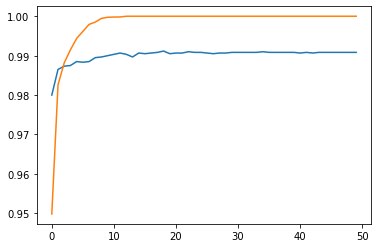

In [337]:
accuracy = epoch_history_i.history.get('accuracy')
val_accuracy = epoch_history_i.history.get('val_accuracy')

plt.plot(val_accuracy)
plt.plot(accuracy)

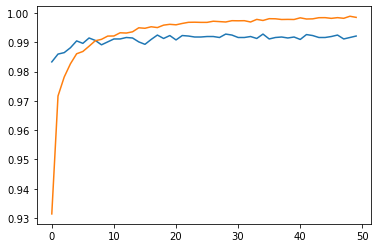

In [341]:
accuracy = epoch_history_ii.history.get('accuracy')
val_accuracy = epoch_history_ii.history.get('val_accuracy')

plt.plot(val_accuracy)
plt.plot(accuracy)

When the model have dropouts, the in-sample accuracy approaches 1 much more slowly than the model without dropouts. This means the overfitting happens slower.

#### ii.

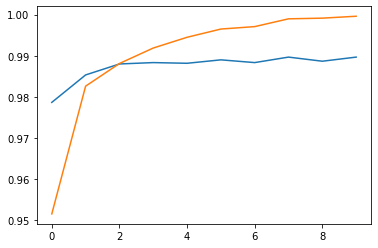

In [343]:
accuracy = epoch_history.history.get('accuracy')
val_accuracy = epoch_history.history.get('val_accuracy')

plt.plot(val_accuracy)
plt.plot(accuracy)

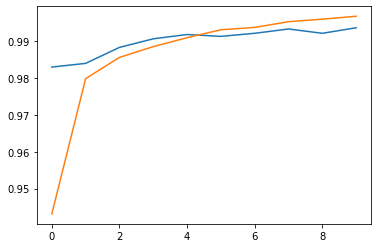

In [342]:
accuracy = epoch_history_iii.history.get('accuracy')
val_accuracy = epoch_history_iii.history.get('val_accuracy')

plt.plot(val_accuracy)
plt.plot(accuracy)

For cnn with two convolution layers, the in-sample accuracy increases at similar rates but validation accuracy is generally higher than that of cnn with only one convolution layer.

#### iii.

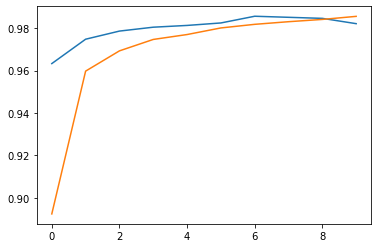

In [348]:
accuracy = epoch_history_iv_1.history.get('accuracy')
val_accuracy = epoch_history_iv_1.history.get('val_accuracy')

plt.plot(val_accuracy)
plt.plot(accuracy)

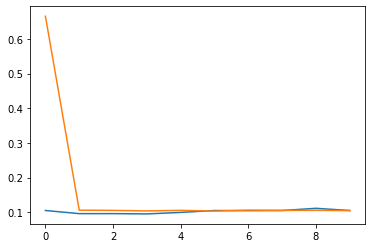

In [345]:
accuracy = epoch_history_iv_2.history.get('accuracy')
val_accuracy = epoch_history_iv_2.history.get('val_accuracy')

plt.plot(val_accuracy)
plt.plot(accuracy)

For $\alpha = 0.001$, in-sample accuracy increases very slowly and the overfitting happens very late.   
For $\alpha = 0.1$, the objective is traped in a local minimum so that accuracy cannot be improved.

# Q2

### a. load the image

In [306]:
img= image.load_img('mona.jpg')
img_arr = image.img_to_array(img)
img_arr.shape

(900, 604, 3)

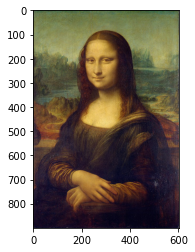

In [307]:
imshow(img_arr/255.)

### b. Preprocessing the input

In [308]:
x = np.random.randint(900, size = 5000)
y = np.random.randint(604, size = 5000)
inputs = np.transpose(np.array([x,y])).reshape((5000,2))

The advantage of decision trees is that we do not need to preprocess the data. Therefore, we do not need to preprocess input for random forest

### c. Preprocessing the output

In [309]:
# take sample points from the image
sample = img_arr[x,y]
# normalize the output
outputs = sample/255.
# separate by color
outputs = np.transpose(outputs).reshape((3,5000))
red = outputs[0]
blue = outputs[1]
green = outputs[2]

In [317]:
# define the function that will output the final image given a model
def fit_model(regressor):
    red_model = regressor.fit(inputs, red)
    blue_model = regressor.fit(inputs, blue)
    green_model = regressor.fit(inputs, green)
    # predict the entire image
    target = np.array([(x,y) for x in range(900) for y in range(604)])
    red_output = red_model.predict(target)
    blue_output = blue_model.predict(target)
    green_output = green_model.predict(target)
    prediction = np.array([red_output,blue_output,green_output])
    output_img = np.transpose(prediction).reshape((900,604,3))
    imshow(output_img)
    plt.show()

### d. Final image

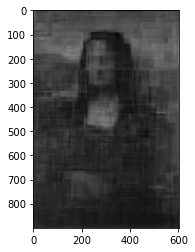

In [313]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
fit_model(regressor)

### e. Experimentation

#### i.

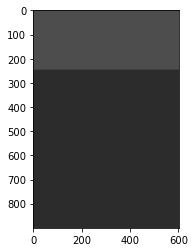

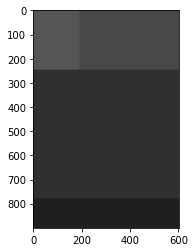

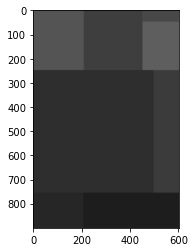

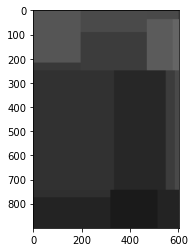

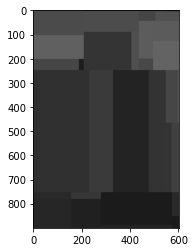

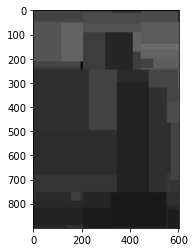

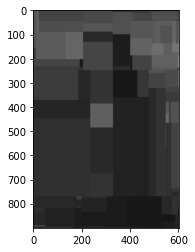

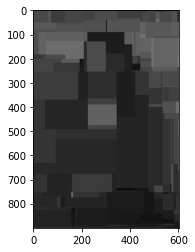

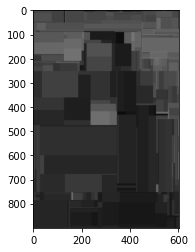

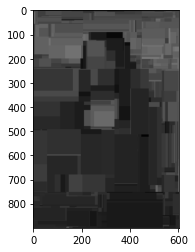

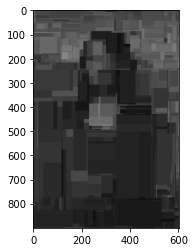

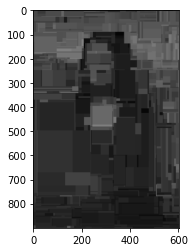

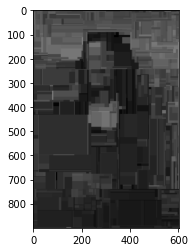

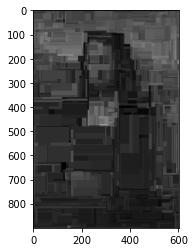

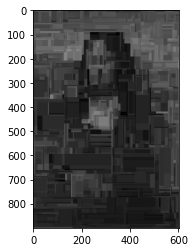

In [318]:
models = [RandomForestRegressor(max_depth=i, n_estimators=1) for i in range(1,16)]
for i in models:
    fit_model(i)

#### ii.

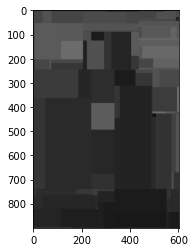

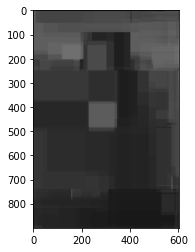

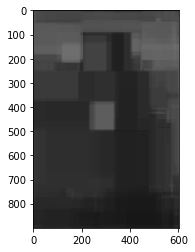

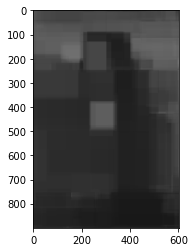

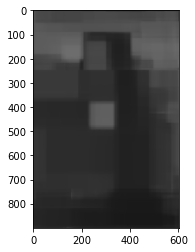

In [319]:
models = [RandomForestRegressor(max_depth=7, n_estimators=i) for i in [1,3,5,10,100]]
for i in models:
    fit_model(i)

#### iii.

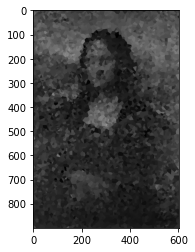

In [325]:
outputs = np.transpose(sample).reshape((3,5000))
red = outputs[0]
blue = outputs[1]
green = outputs[2]
regressor = KNeighborsClassifier(n_neighbors=1)
red_model = regressor.fit(inputs, red)
blue_model = regressor.fit(inputs, blue)
green_model = regressor.fit(inputs, green)
target = np.array([(x,y) for x in range(900) for y in range(604)])
red_output = red_model.predict(target)
blue_output = blue_model.predict(target)
green_output = green_model.predict(target)
prediction = np.array([red_output,blue_output,green_output])
output_img = np.transpose(prediction).reshape((900,604,3))
imshow(output_img/255.)
plt.show()

#### iv.

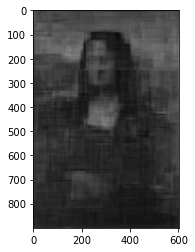

In [357]:
outputs = sample/255.
# separate by color
outputs = np.transpose(outputs).reshape((3,5000))
red = outputs[0]
blue = outputs[1]
green = outputs[2]
model = RandomForestRegressor(max_depth=3000, n_estimators=50)
fit_model(model)

Choose max_depth = 3000 < 5000 so that the number of regions is enough to overcome underfitting. Choose n_estimators = 50 to deal with overfitting.

### f. Analysis

#### i.

At each level, the decision tree splits on either the x-axies or the y-axies and finally divide the image into small rectangles.    
Define x as the x value, y as the y value and m as the mean of data points fall in the critiria,      
At root note:   
if x/y >= threshold: next = left_sub_tree,   
else: next = right_sub_tree   
At leaf note:   
value_in_patch = m

#### ii.

As explained before, the patches of color are rectangles.

#### iii.

There will be $2^n$ regions, where n is the maximum depth of the decision tree.

#### iv.

Since random forest is averaging over leaf color pathces of different decision trees, finding the maximum number of color patches after averaging is equivalent to finding the maximum number of regions divided by $2^n$ sets, where n is the maximum depth of the decision tree.   
There is a maximum of $2^nC 2$ ways to combine $2^n$ sets and therefore $2 * 2^nC2$ interaction points. Therefore there will be $2 * 2^nC2 + 1$ regions divided by these sets.   
In conclusion, there will be a maximum of $2^n * (2^n-1)+1$ patches of colors